## Image EDA
In this notebook I will perform a brief exploritory data analysis on the dominant colours of the shoe data set. I will take into account retailers, price and shoe type to see if any of these attributes drive shoe colour.

In [24]:
import pandas as pd
from os import listdir
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
import numpy as np
from sqlalchemy import create_engine

Intially I will plot three scatter plots that display the 1st 2nd and 3rd most dominant colours for each pair of shoes, the plot will use Red,Green and Blue for the axis and 

In [11]:
## Read in extracted colour data
Colours=pd.read_csv('Colour_Features.csv')

In [12]:
Colours.head()

Red  Green  Blue  Red_2  Green_2  Blue_2  Red_3  Green_3  Blue_3    ID
0   51     49    57    107      106     108     29       28      33  1557
1  170    112    73    125       79      46    197      141     106  1558
2  179    152   126     77       62      53    154      125     100  1559
3   25     21    21     88       86      86     46       42      42  1560
4  146    144   140    242      241     239    192      190     187  1561

## Most Dominant Colour in Each Image
Each point represents one shoe

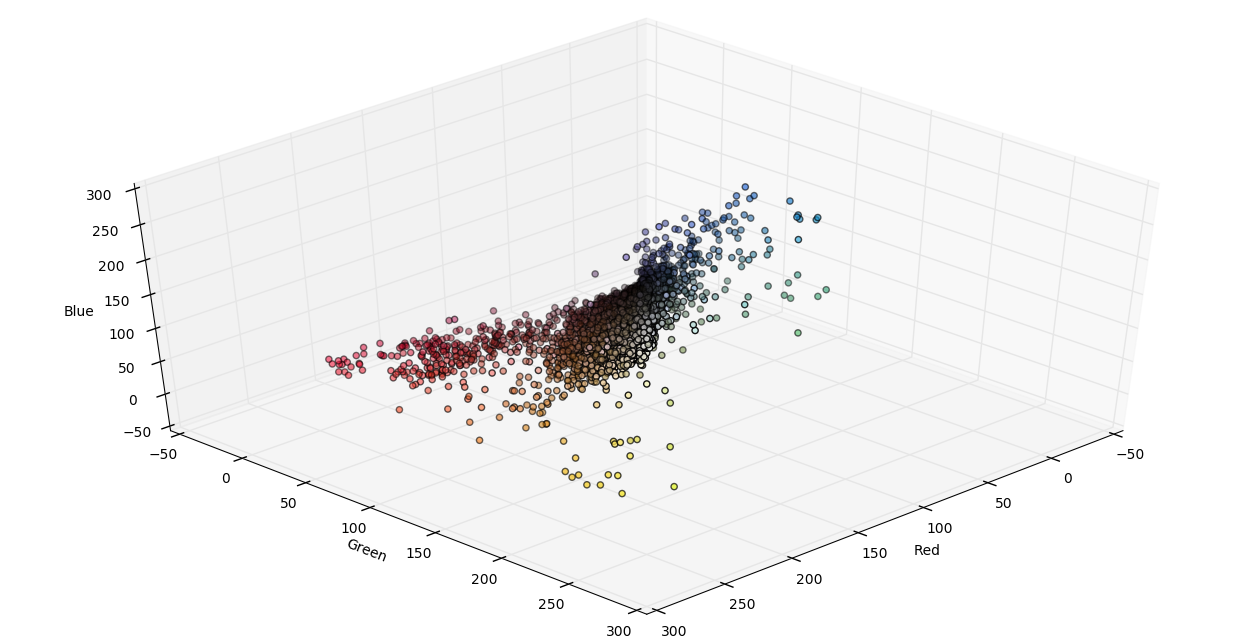

In [13]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Colours.Red, 
           Colours.Green,
           Colours.Blue,  
           c= [(r.Red / 255., r.Green / 255., r.Blue / 255.) for i,r in Colours.iterrows()])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.view_init(elev=45,azim=45)

plt.show()

## 2nd Most Dominant Colour in Each Image
Each point represents one shoe

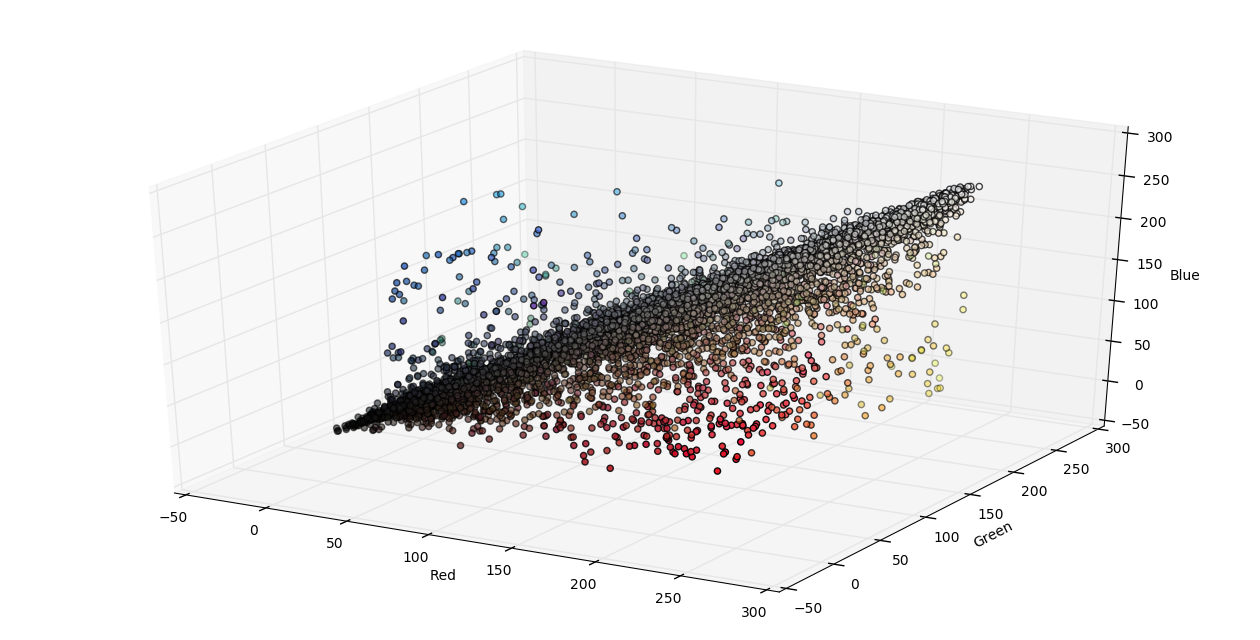

In [14]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Colours.Red_2, 
           Colours.Green_2,
           Colours.Blue_2,  
           c= [(r.Red_2 / 255., r.Green_2 / 255., r.Blue_2 / 255.) for i,r in Colours.iterrows()])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()

## 3rd Most Dominant Colour in Each Image
Each point represents one shoe

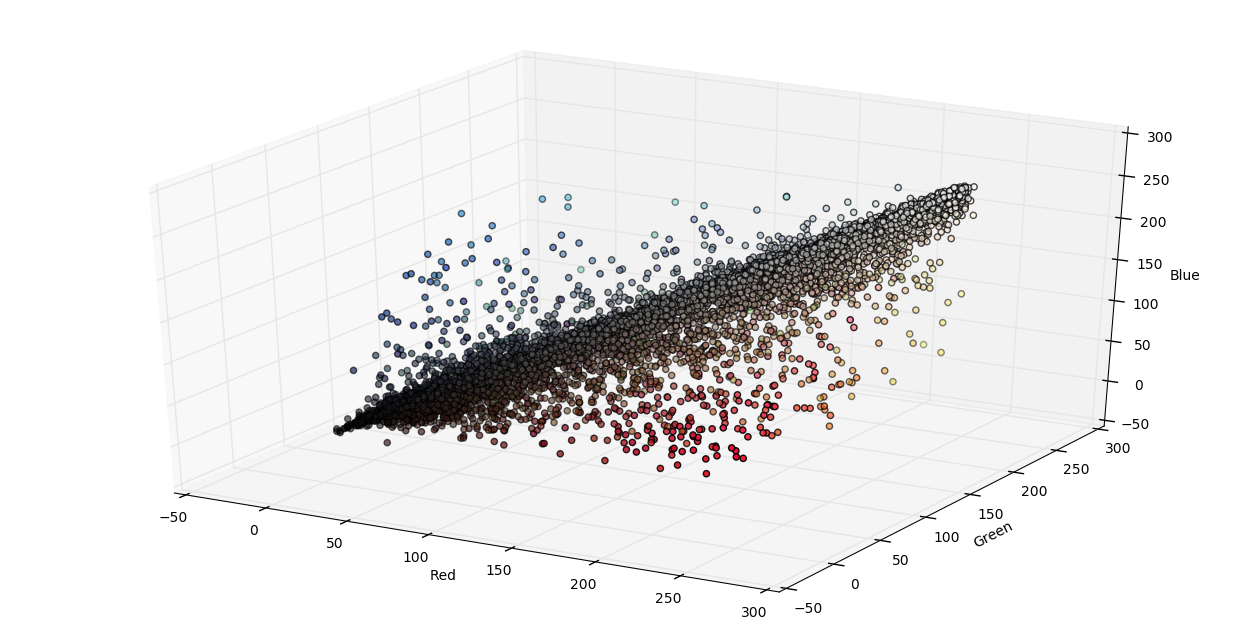

In [15]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Colours.Red_3, 
           Colours.Green_3,
           Colours.Blue_3,  
           c= [(r.Red_3 / 255., r.Green_3 / 255., r.Blue_3 / 255.) for i,r in Colours.iterrows()])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()

Below I have created a short video that will be used in a presntation of the restults, it provides a 3d view in order for viewers to see clearly the areas of high density etc.

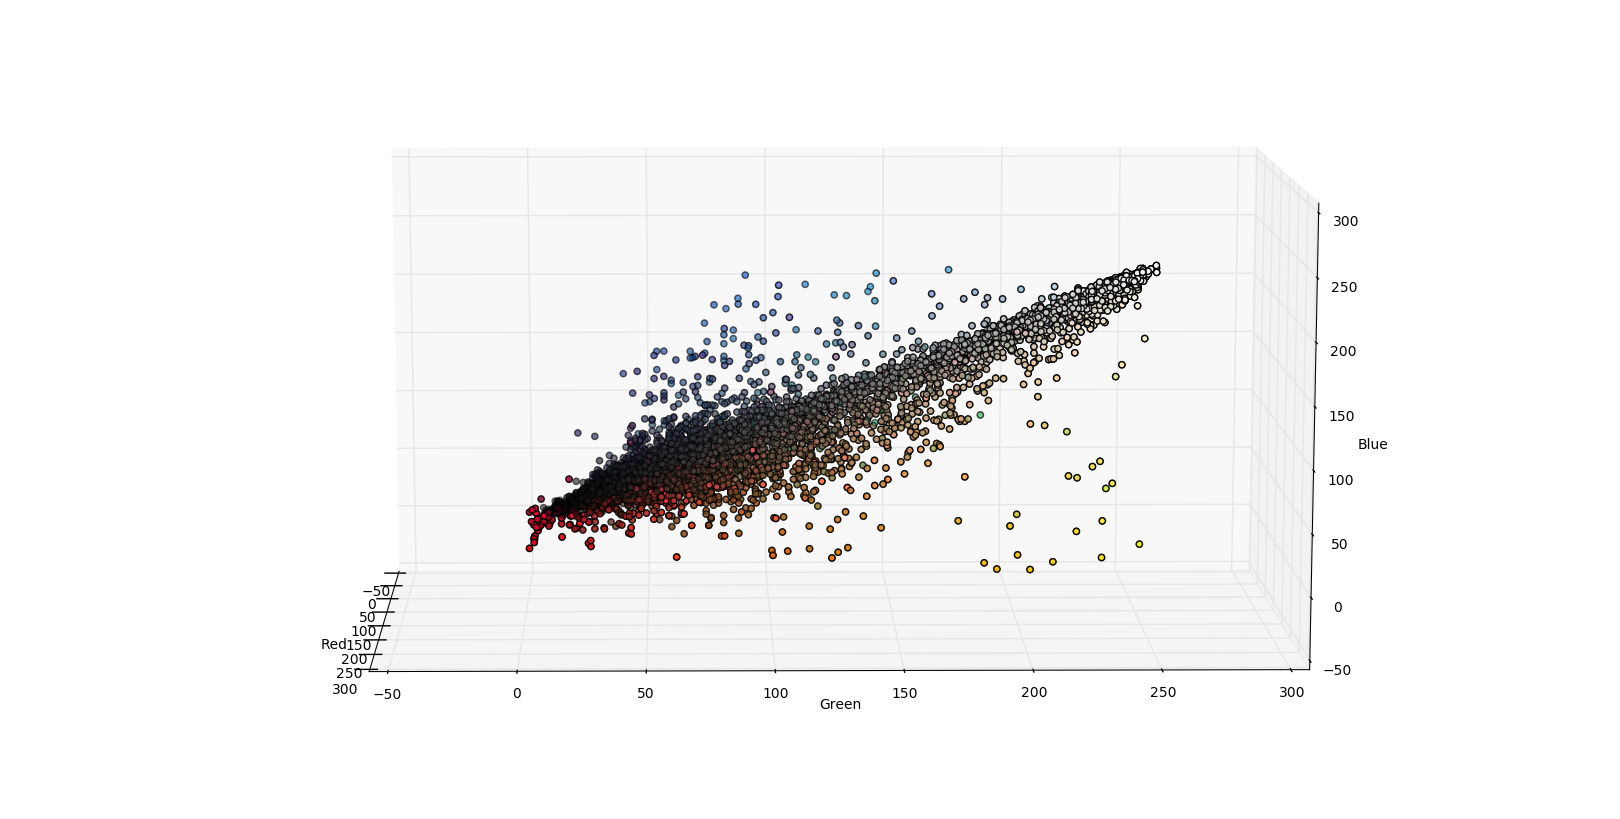

In [23]:
fig = plt.figure(figsize = (16,8))
ax = Axes3D(fig)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

def init():

    ax.scatter(Colours.Red, 
               Colours.Green,
               Colours.Blue,  
               c= [(r.Red / 255., r.Green / 255., r.Blue / 255.) for i,r in Colours.iterrows()])

    return()

def animate(i):
    ax.view_init(elev=10, azim=i)
    return()
# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

I will now compare the colour spectrums for various types of shoe.

In [25]:
engine=create_engine('postgresql://localhost:5432/capstone_project')
Data=pd.read_sql_table('mens_shoes_cleaned',con=engine)

In [26]:
## Preview of the data scraped from the retail websites.
Data.head(2)

id              brand         retailer  \
0  728  alexander mcqueen  Matches_Fashion   
1  729     armando cabral  Matches_Fashion   

                             description  \
0  raised sole hightops leather trainers   
1            lace up leather derby shoes   

                                           image_url  \
0  http://assetsprx.matchesfashion.com/img/produc...   
1  http://assetsprx.matchesfashion.com/img/produc...   

                                       image_url_alt  price       date  \
0  http://assetsprx.matchesfashion.com/img/produc...  395.0 2016-11-22   
1  http://assetsprx.matchesfashion.com/img/produc...  405.0 2016-11-22   

     type_1    type_2  
0  hightops  trainers  
1     derby      lace

In [29]:
Data.type_1.value_counts()

sneakers    3906
hightops    1132
boots        784
loafers      719
slip         607
derby        543
brogues      377
ankle        323
chelsea      284
oxfords      276
trainers     260
drivers      239
monk         238
lace         192
sandals      101
chukka        98
gommino       21
Name: type_1, dtype: int64

In [31]:
Output=pd.merge(left=Data,right=Colours,left_on='id',right_on='ID',how='inner')

In [45]:
Output.type_1.value_counts().index

Index([u'sneakers', u'hightops', u'boots', u'loafers', u'slip', u'derby',
       u'brogues', u'ankle', u'oxfords', u'chelsea', u'monk', u'drivers',
       u'lace', u'chukka', u'sandals', u'trainers', u'gommino'],
      dtype='object')

In [46]:
def three_D_type_plot(category):
    fig = plt.figure(figsize = (16,8))
    ax = fig.add_subplot(111, projection='3d')


    ax.scatter(Output[Output.type_1==category].Red, 
               Output[Output.type_1==category].Green,
               Output[Output.type_1==category].Blue,  
               c= [(r.Red_2 / 255., r.Green_2 / 255., r.Blue_2 / 255.) for i,r in Output[Output.type_1==category].iterrows()])

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(''.join([category,' dominant colours']))
    plt.show()

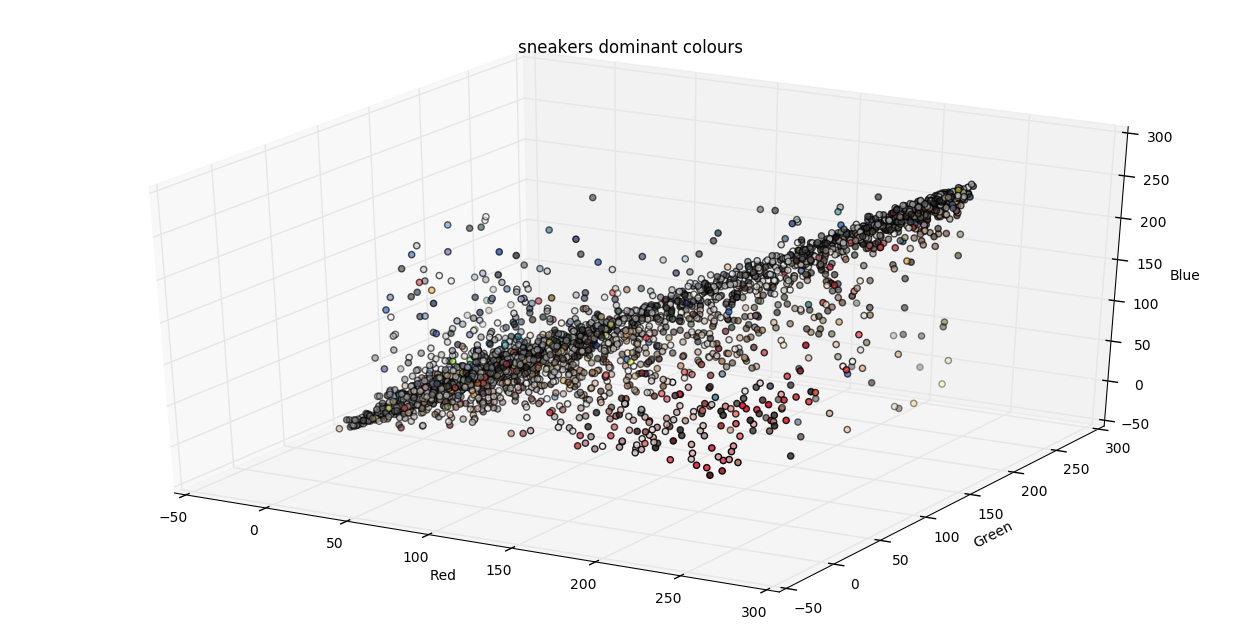

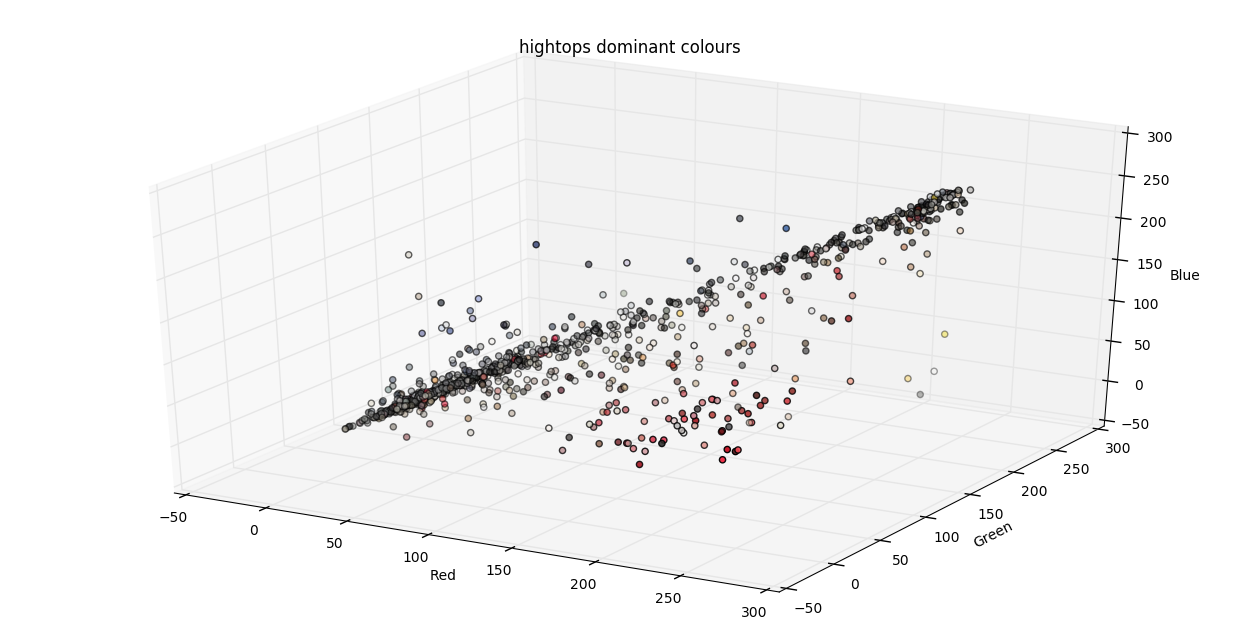

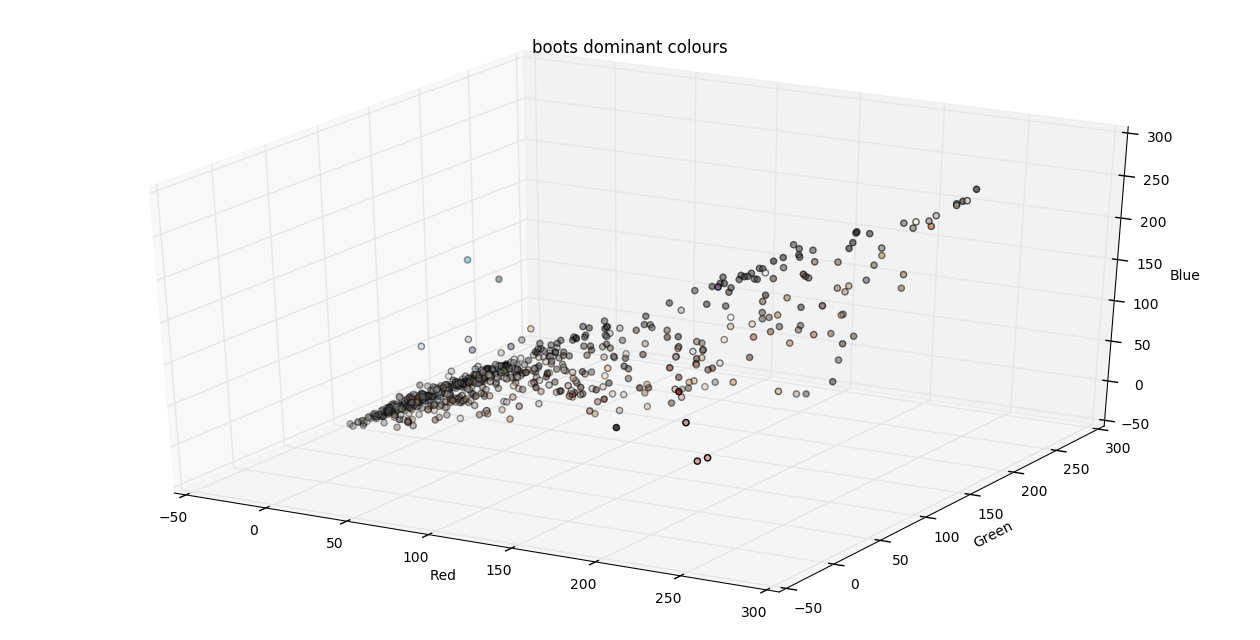

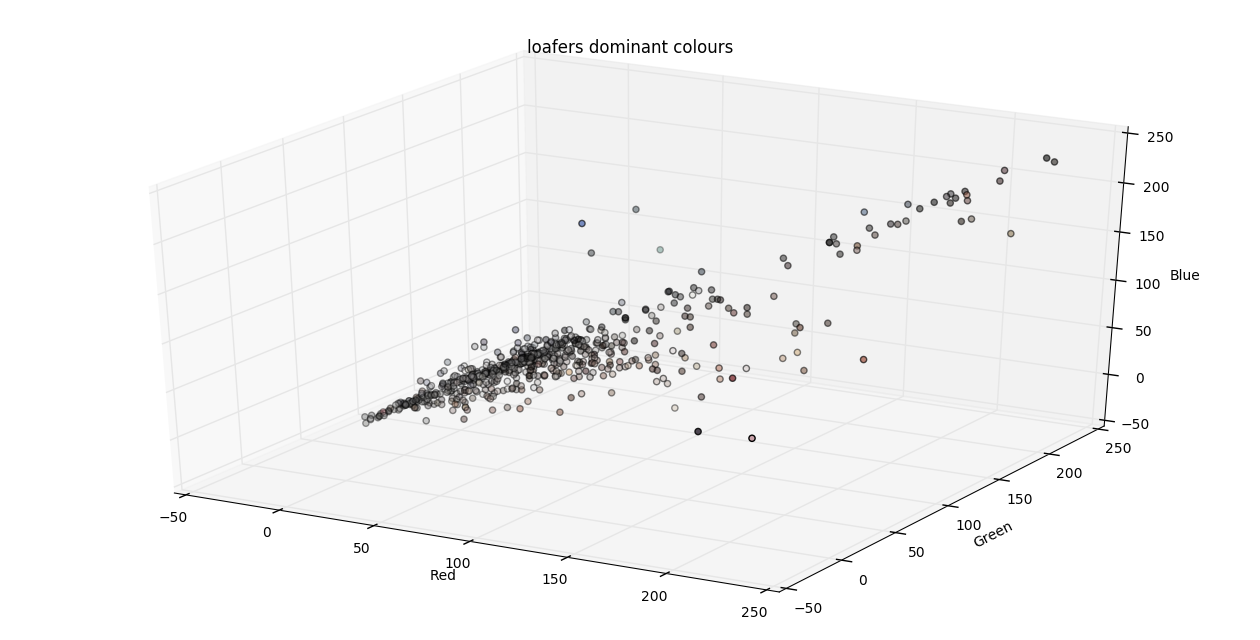

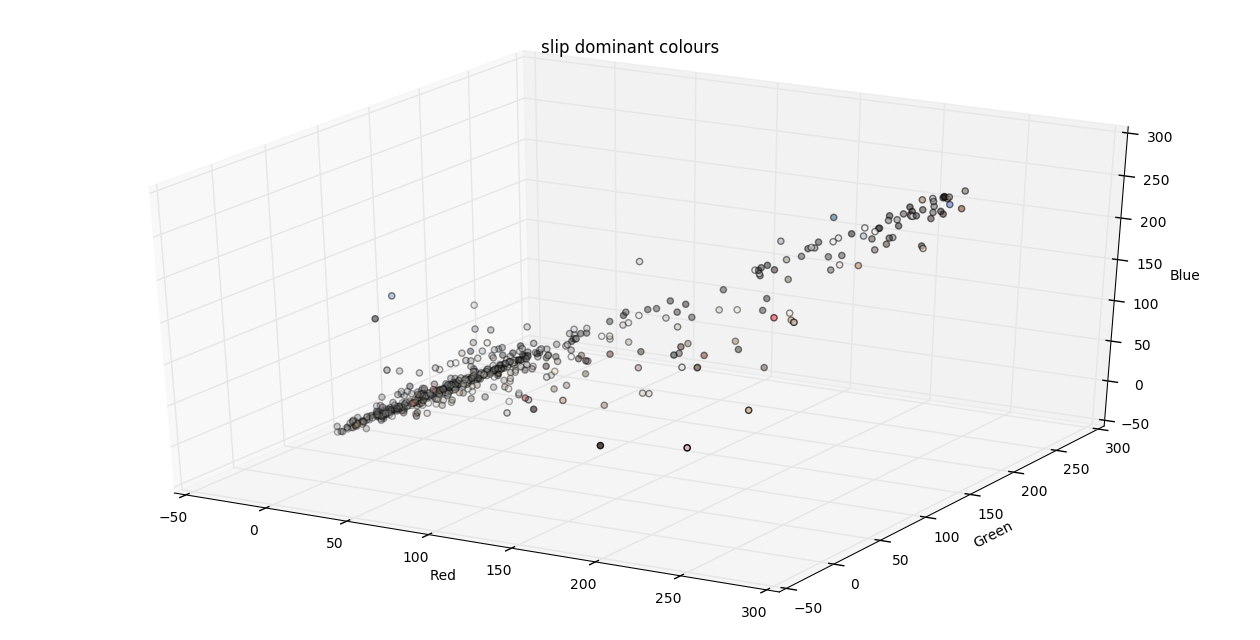

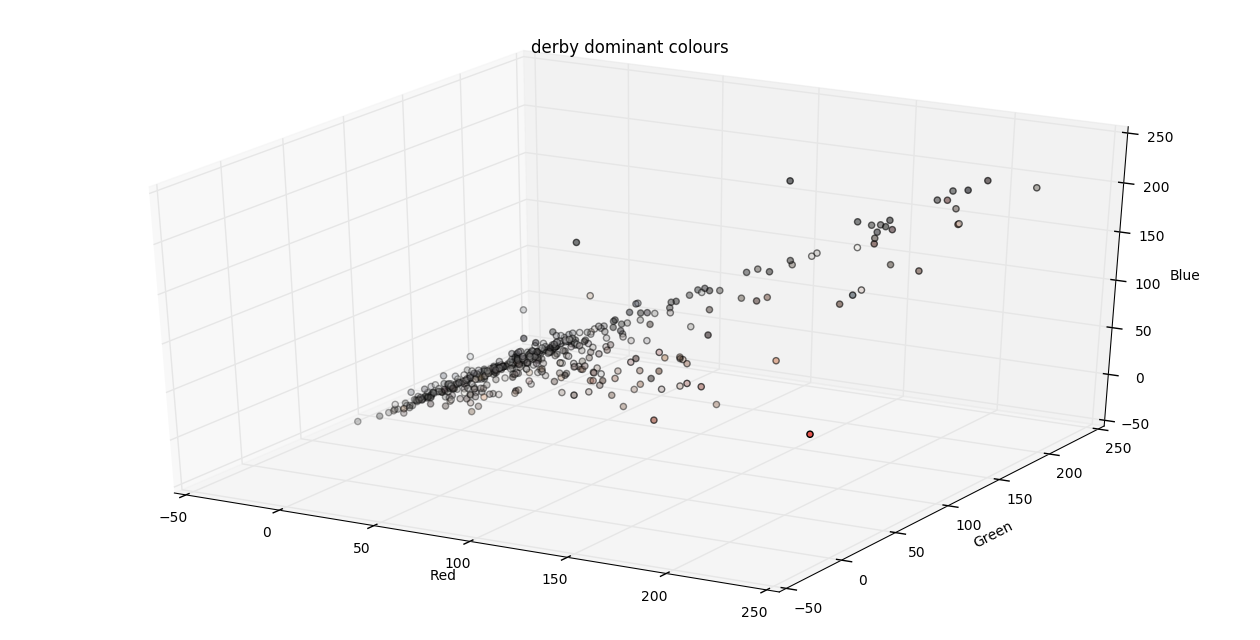

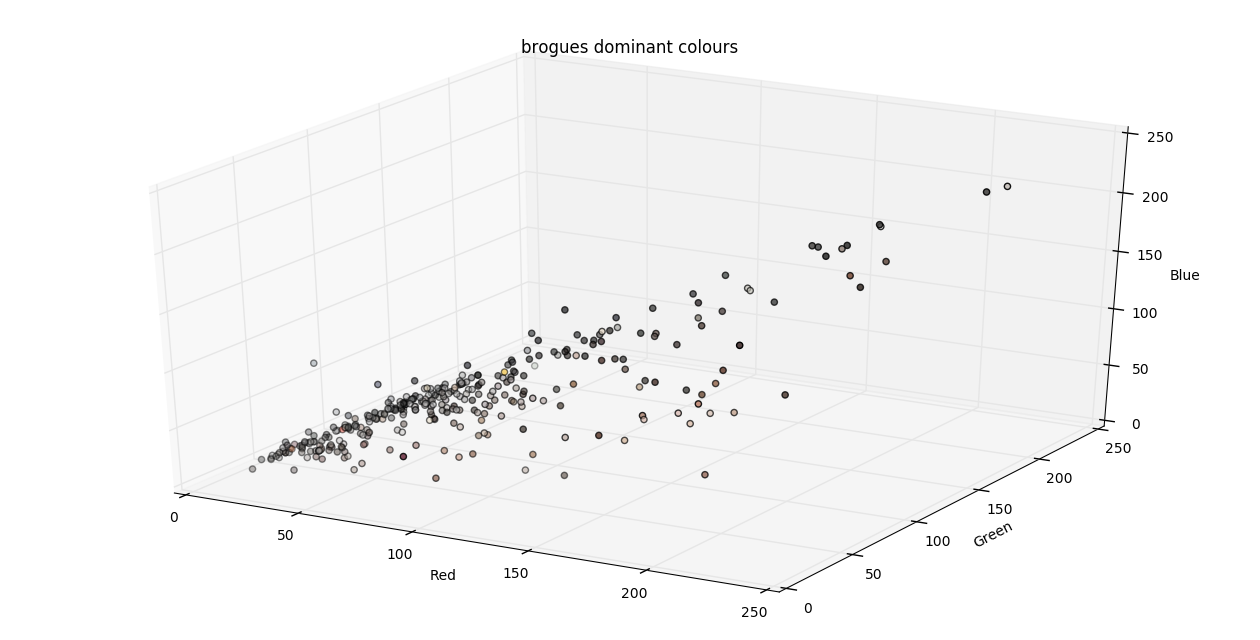

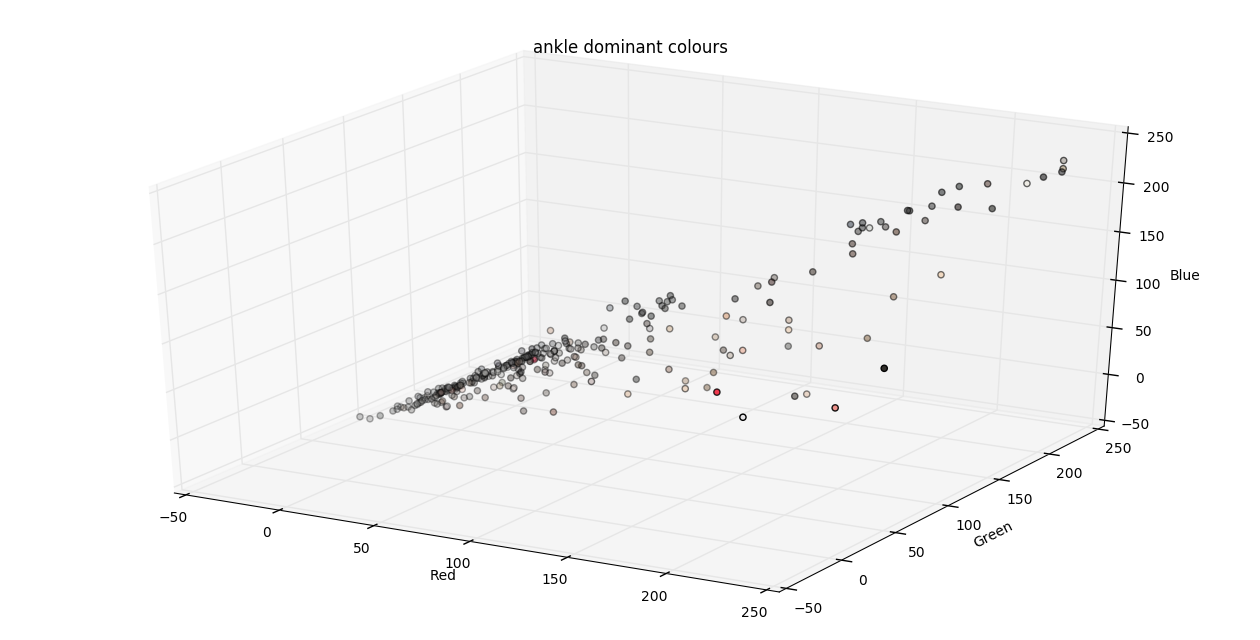

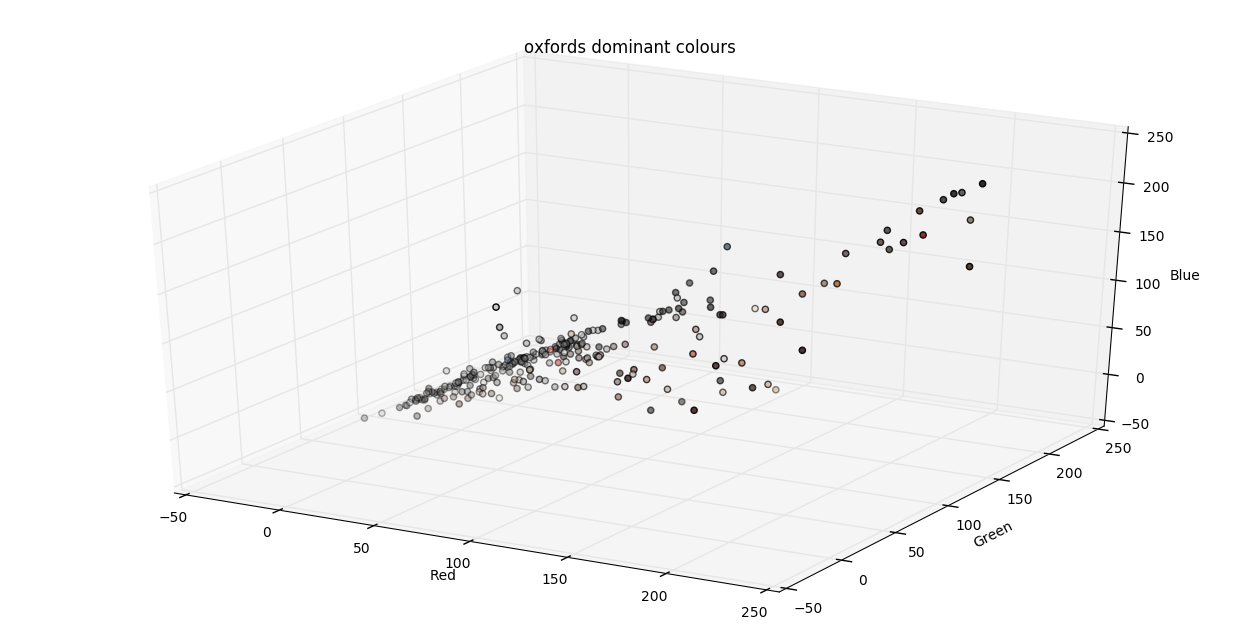

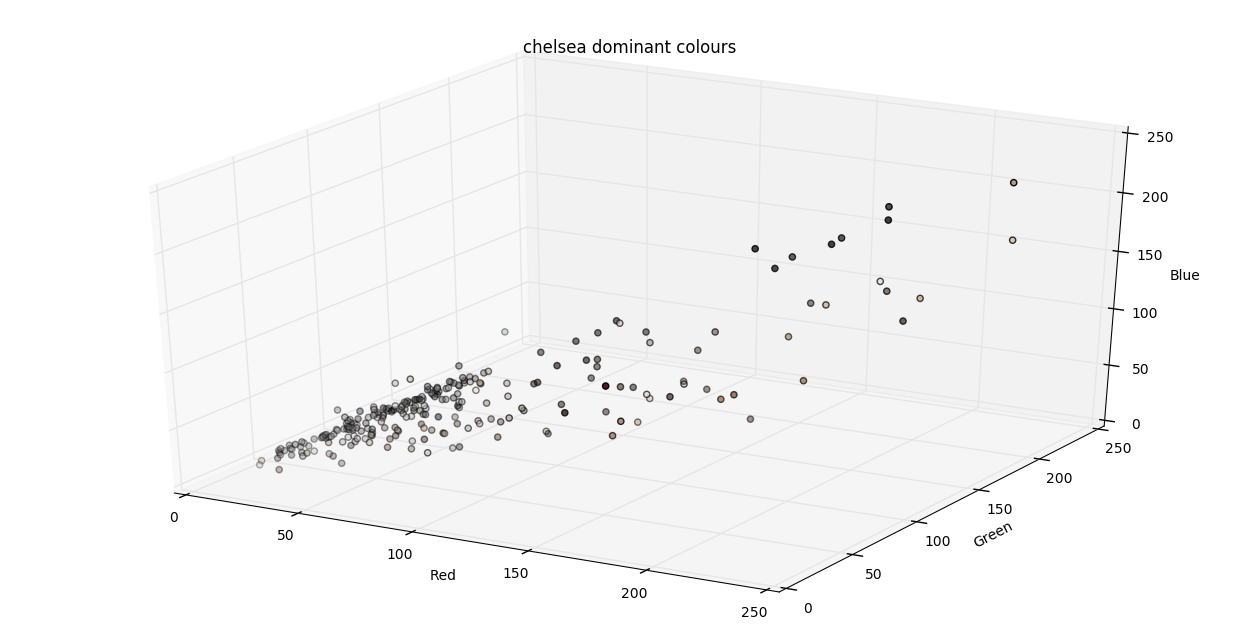

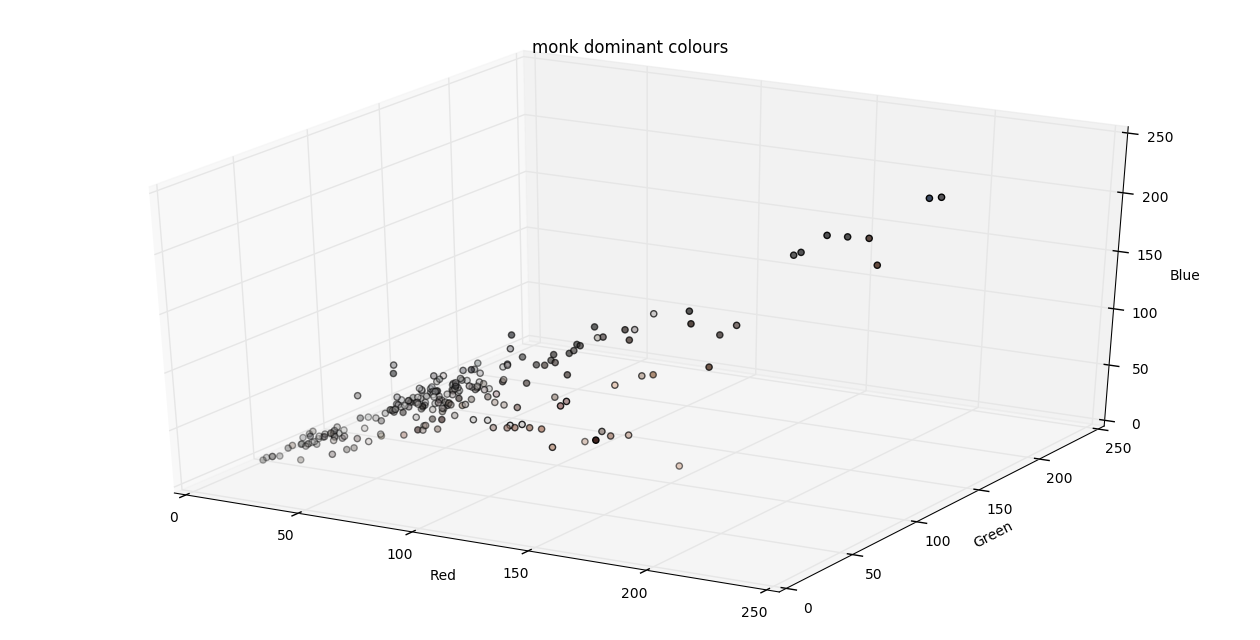

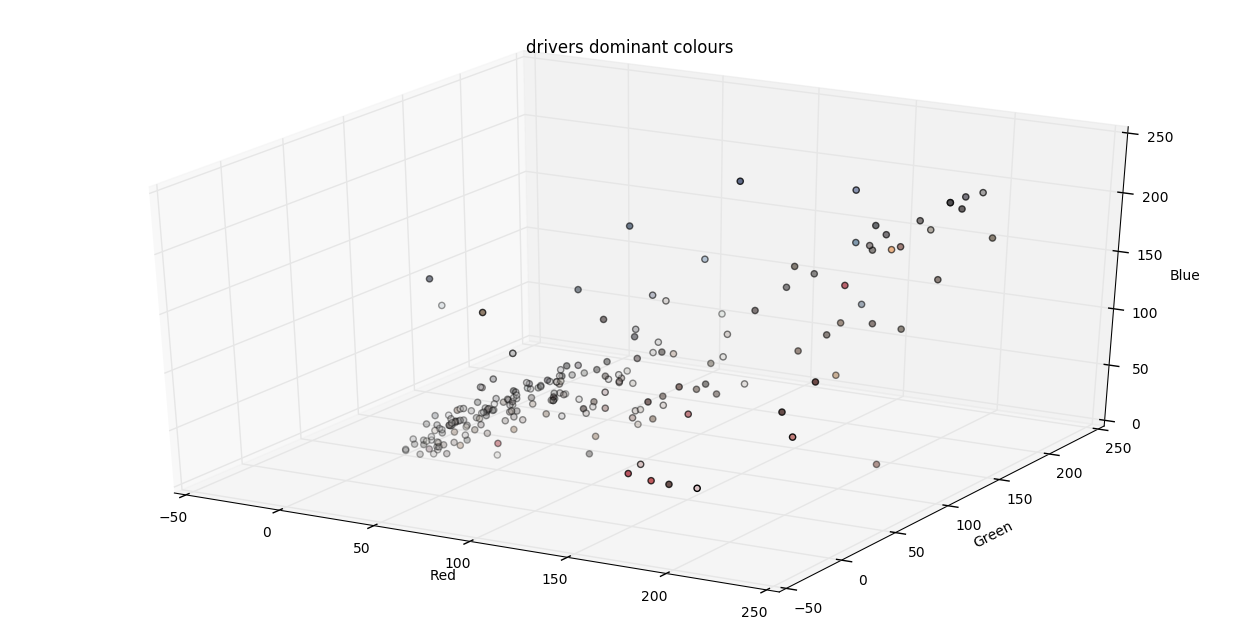

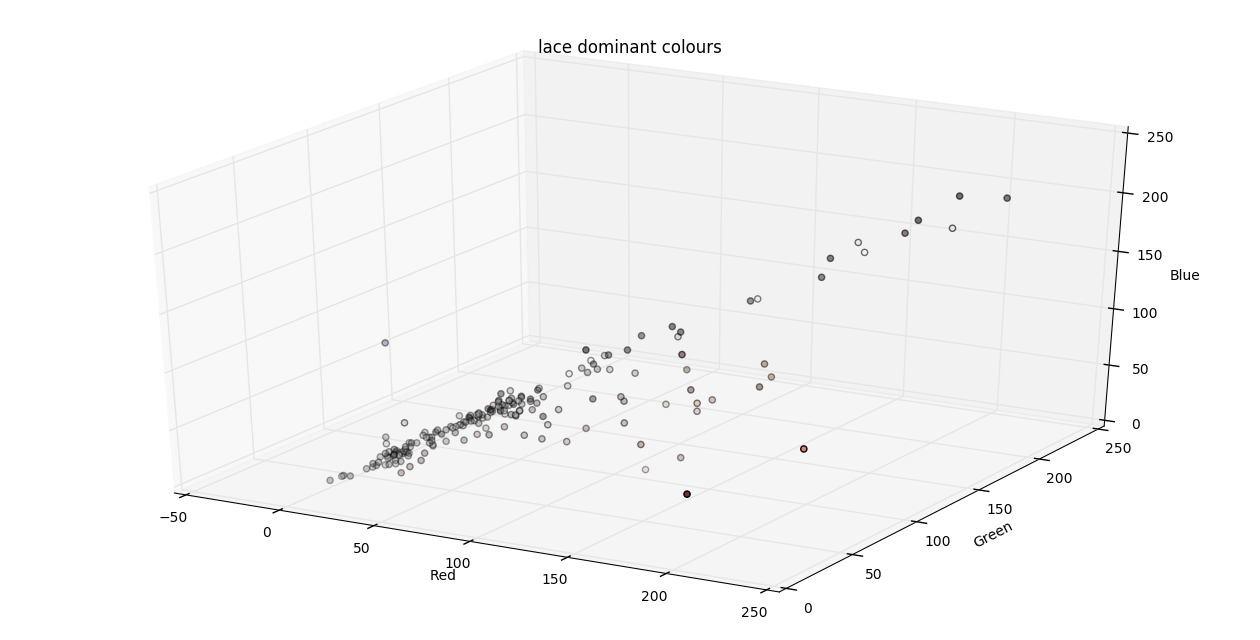

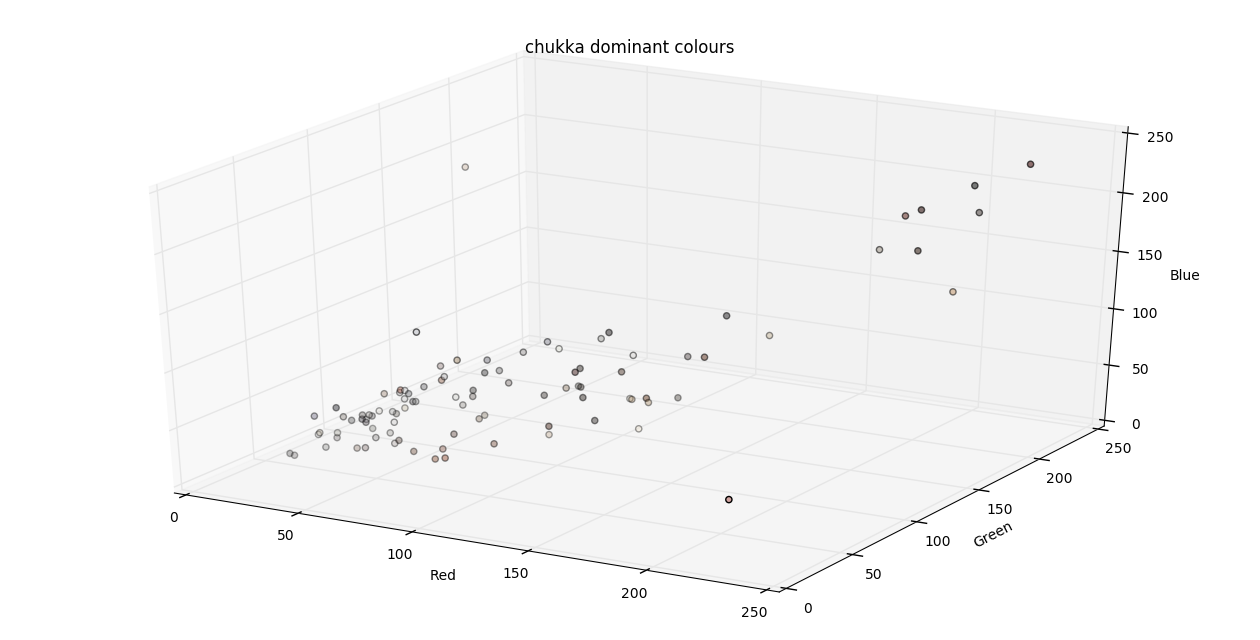

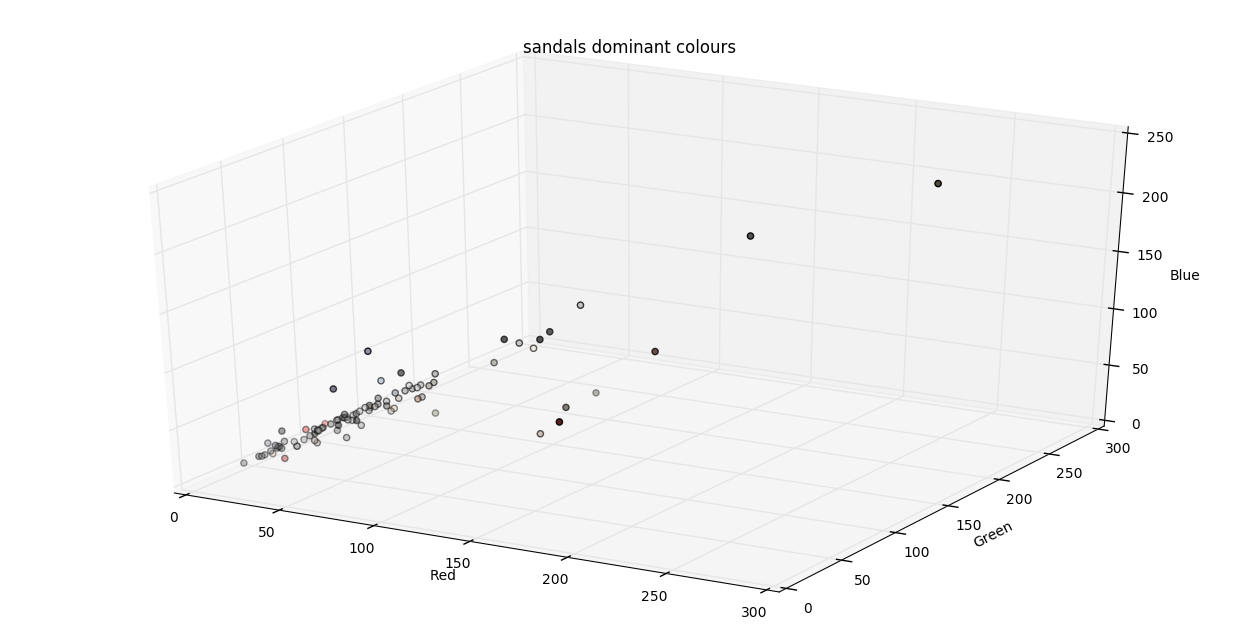

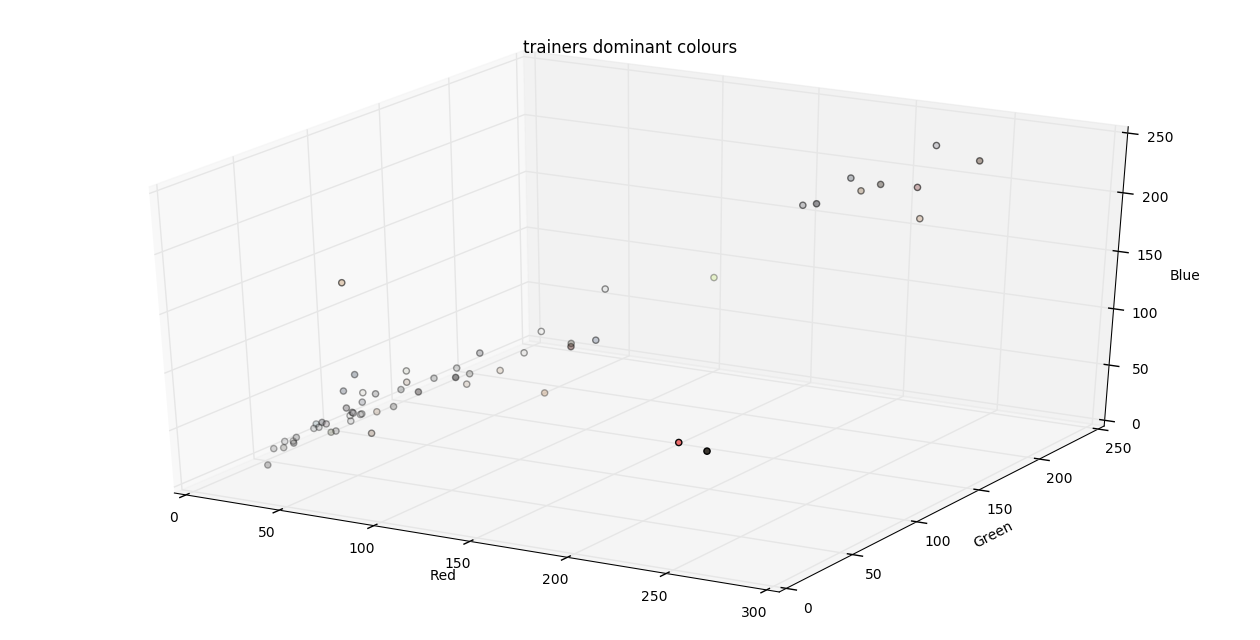

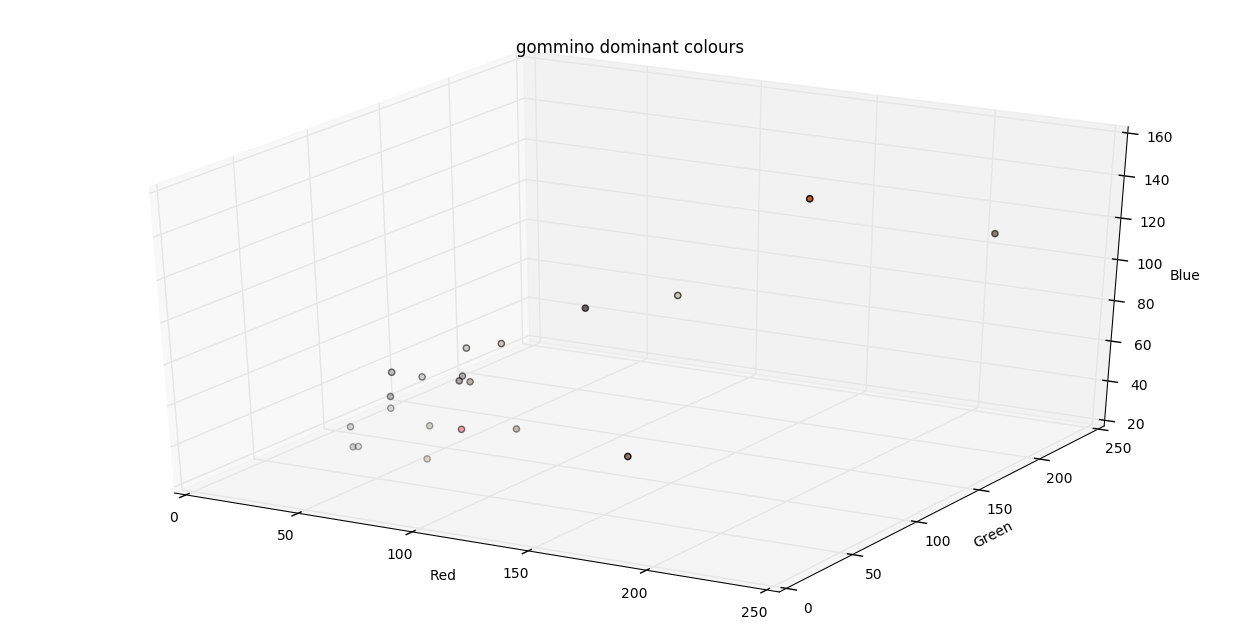

In [47]:
for x in Output.type_1.value_counts().index:
    three_D_type_plot(x)

From the graphs above we can see there is a much higher distribution of colours for snearkers and hightops, where as with boots broges oxfords etc, the distribution is centred around the white/brown/black/grey areas, which is expected for leather based products. Suprisingly most of the trainers seem to be in the grey area as well.

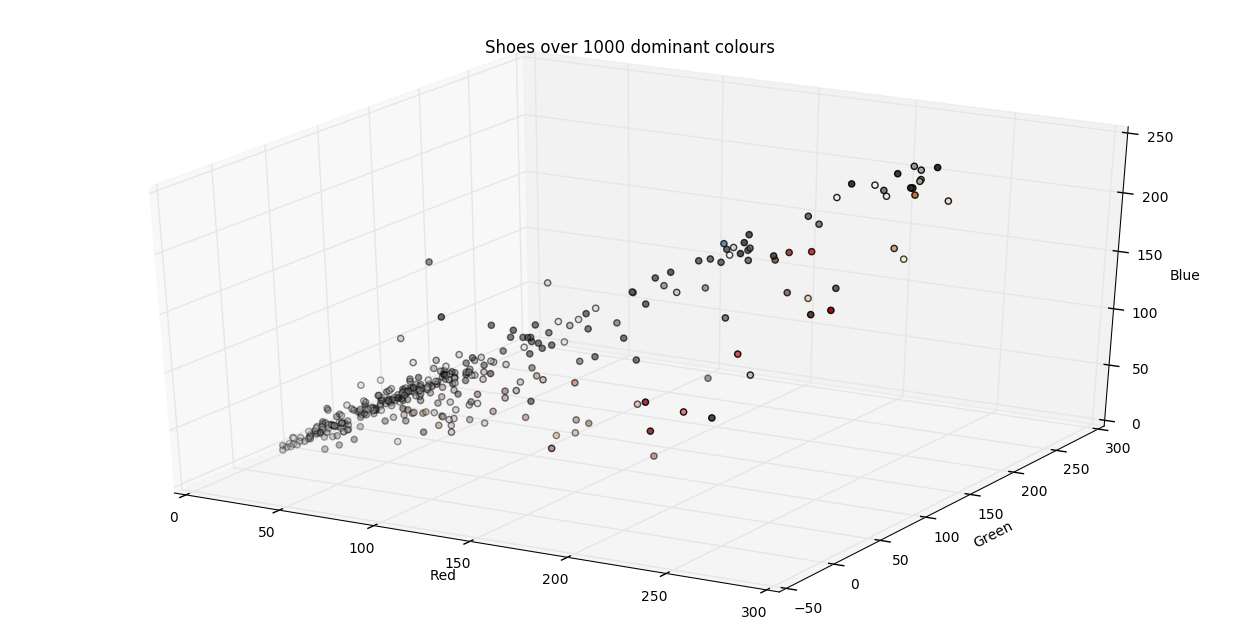

In [52]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Output[Output.price>1000].Red, 
               Output[Output.price>1000].Green,
               Output[Output.price>1000].Blue,  
               c= [(r.Red_2 / 255., r.Green_2 / 255., r.Blue_2 / 255.) for i,r in Output[Output.price>1000].iterrows()])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Shoes over 1000 dominant colours')
plt.show()

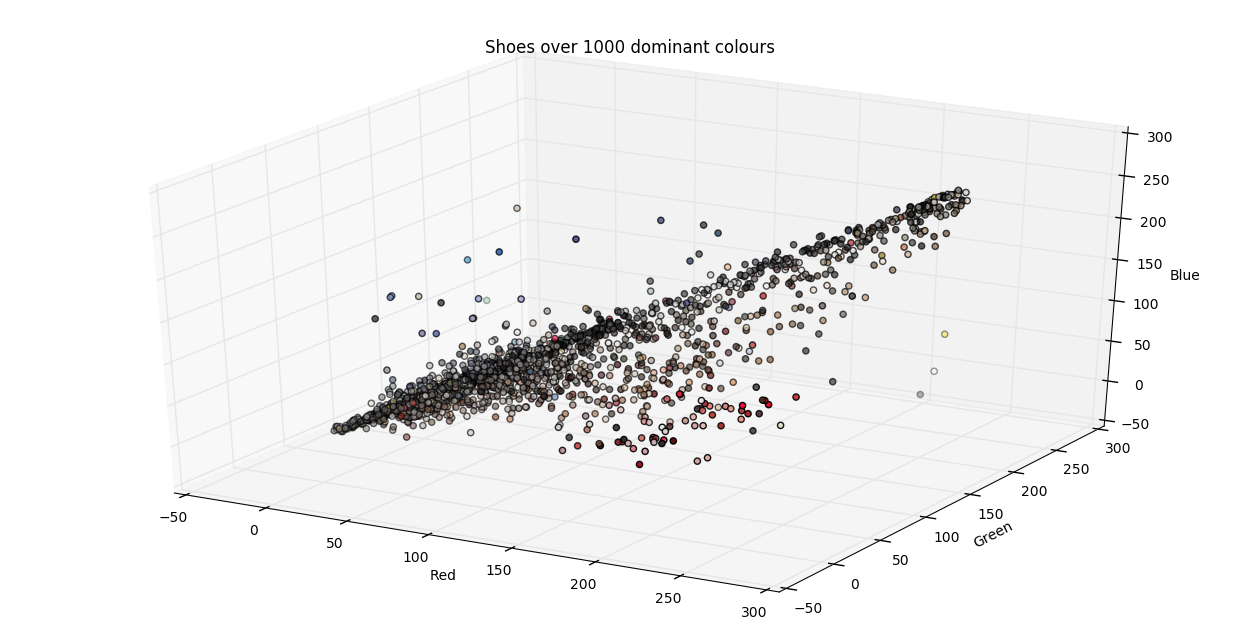

In [63]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Output[(Output.price>500) & (Output.price<1000)].Red, 
               Output[(Output.price>500) & (Output.price<1000)].Green,
               Output[(Output.price>500) & (Output.price<1000)].Blue,  
               c= [(r.Red_2 / 255., r.Green_2 / 255., r.Blue_2 / 255.) for i,r in Output[(Output.price>500) & (Output.price<1000)].iterrows()])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Shoes over 1000 dominant colours')
plt.show()

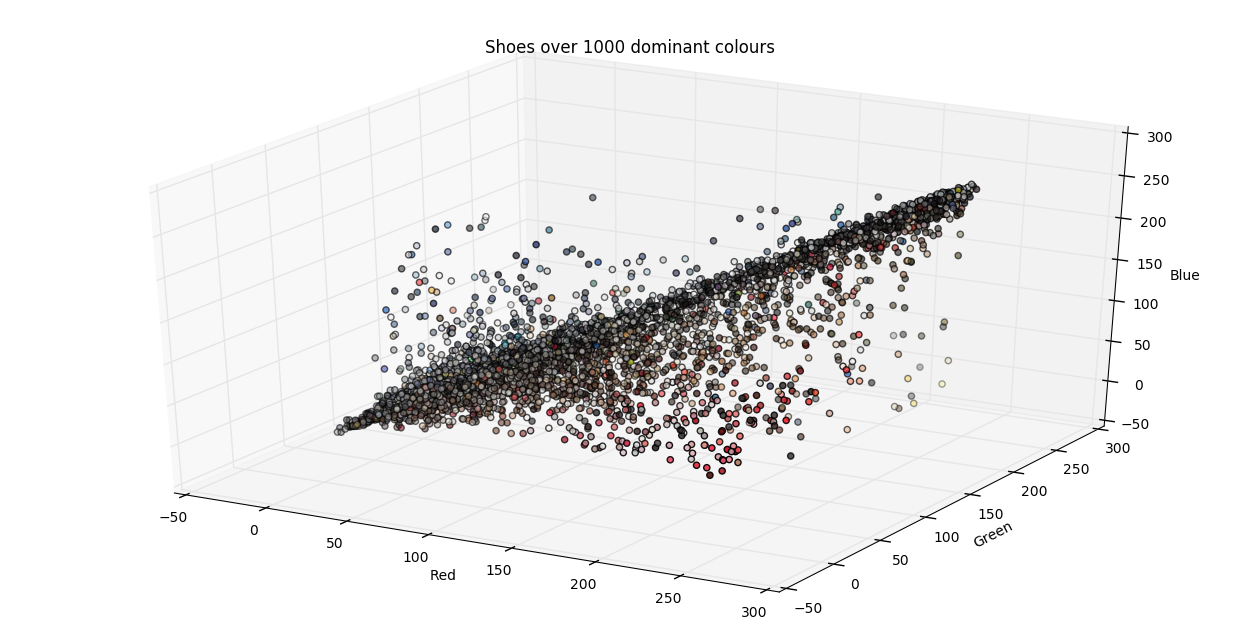

In [64]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Output[Output.price<500].Red, 
               Output[Output.price<500].Green,
               Output[Output.price<500].Blue,  
               c= [(r.Red_2 / 255., r.Green_2 / 255., r.Blue_2 / 255.) for i,r in Output[Output.price<500].iterrows()])

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Shoes over 1000 dominant colours')
plt.show()

It appears that cheaper shoes tend to have a bit more of a colour distrbution, although it is a bit difficult to see, it may be the case that there are just more shoes in this section.